#### Connect to PostgreSQL to fetch data for both codes

In [20]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

# Connect to PostgreSQL to fetch data for both codes
dbname = 'dap_data'
user = 'postgres'
password = 'root'
host = 'localhost'
port = '5432'

conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
cur = conn.cursor()

print("connected")

connected


#### Extract data from postgre

In [21]:


# Retrieve data from PostgreSQL for code 1
cur.execute('''
    SELECT region, AVG(CASE WHEN name = 'Nitrogen dioxide (NO2)' THEN avg_value END) AS avg_NO2,
           AVG(CASE WHEN name = 'Fine particles (PM 2.5)' THEN avg_value END) AS avg_PM25,
           AVG(CASE WHEN name = 'Outdoor Air Toxics - Benzene' THEN avg_value END) AS avg_Benzene,
           AVG(CASE WHEN name = 'Outdoor Air Toxics - Formaldehyde' THEN avg_value END) AS avg_Formaldehyde
    FROM air_quality
    GROUP BY region
    ORDER BY region
''')
rows_code1 = cur.fetchall()
df_code1 = pd.DataFrame(rows_code1, columns=['REGION', 'Avg_NO2', 'Avg_PM25', 'Avg_Benzene', 'Avg_Formaldehyde'])

# Retrieve data from PostgreSQL for code 2
cur.execute('''
    SELECT region, AVG(total_olung) as avg_total_olung
    FROM cancerdata
    GROUP BY region
    ORDER BY region
''')
rows_code2 = cur.fetchall()
df_code2 = pd.DataFrame(rows_code2, columns=['REGION', 'Avg_Total_OLUNG'])

# Close the PostgreSQL connection
conn.close()

print("Extracted air quality and cancer data")


Extracted air quality and cancer data


#### Visulaisation from cleaned data stored in postgre

C:\Users\Lekshmi Sasidharan\AppData\Local\Temp\ipykernel_10084\2486783776.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_code1['REGION'], rotation=45)


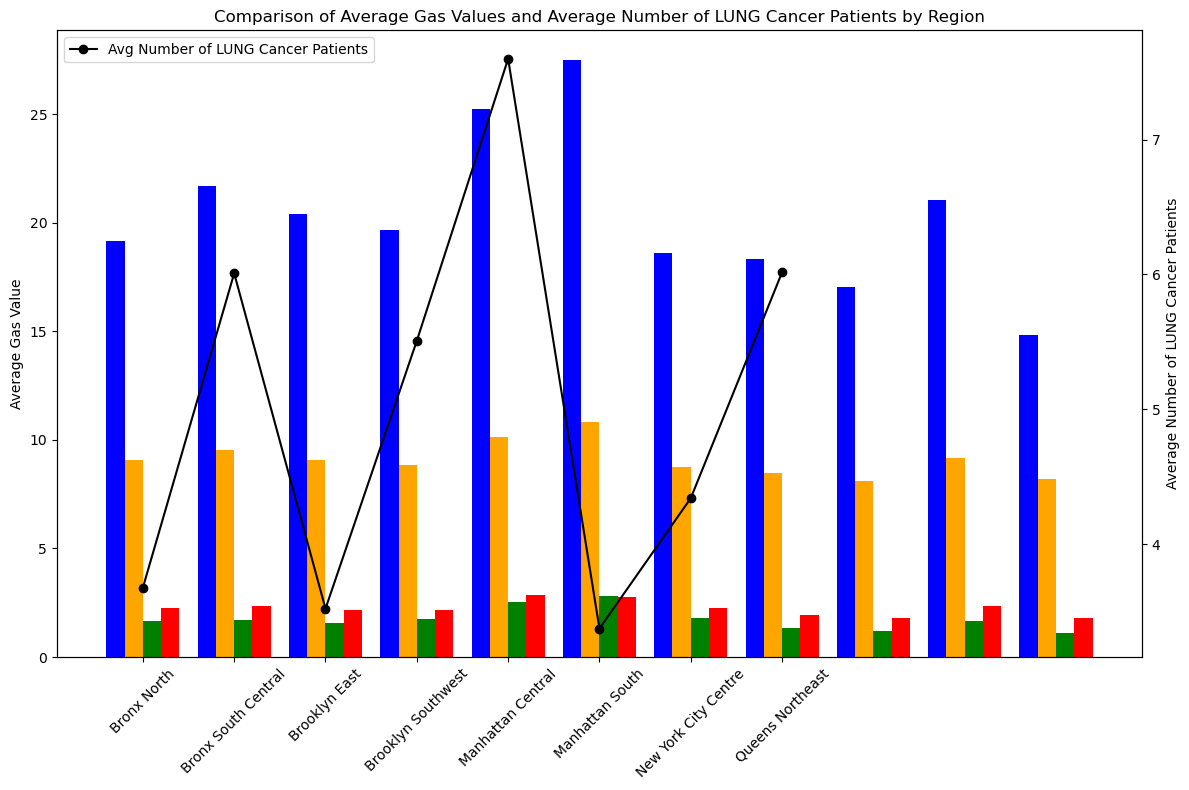

In [22]:
# Plot the combined data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot average values of gases
bar_width = 0.2
bar_positions = np.arange(len(df_code1))

plt.bar(bar_positions - bar_width * 1.5, df_code1['Avg_NO2'], width=bar_width, color='blue', label='Avg NO2')
plt.bar(bar_positions - bar_width * 0.5, df_code1['Avg_PM25'], width=bar_width, color='orange', label='Avg PM2.5')
plt.bar(bar_positions + bar_width * 0.5, df_code1['Avg_Benzene'], width=bar_width, color='green', label='Avg Benzene')
plt.bar(bar_positions + bar_width * 1.5, df_code1['Avg_Formaldehyde'], width=bar_width, color='red', label='Avg Formaldehyde')

# Plot total number of patients
ax2 = ax1.twinx()
ax2.plot(df_code2['REGION'], df_code2['Avg_Total_OLUNG'], color='black', label='Avg Number of LUNG Cancer Patients', marker='o')

plt.xlabel('Region')
ax1.set_ylabel('Average Gas Value')
ax2.set_ylabel('Average Number of LUNG Cancer Patients')
plt.title('Comparison of Average Gas Values and Average Number of LUNG Cancer Patients by Region')


ax1.set_xticklabels(df_code1['REGION'], rotation=45)

#plt.xticks(bar_positions, df_code1['REGION'], rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
